In [36]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

### Data Points
Generate some random data points for the algorithm.

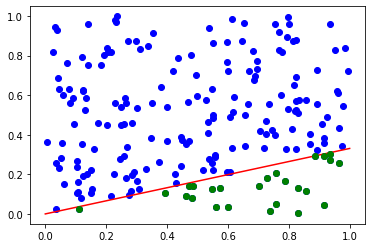

In [37]:
# Generate data points
N = 200
x = nr.rand(N, 2)

# Generate line
x_line = np.linspace(0, 1)
m = nr.rand()

f = lambda x : m*x


plt.plot(x[:, 0], x[:, 1], 'bo')
plt.plot(x_line, f(x_line), 'r')


# Linearly separate the points by the line
y = np.zeros([N,1]);

for i in range(N):
    if(f(x[i,0])>x[i,1]):
        # Point is below line
        y[i] = 1;
        plt.plot(x[i,0],x[i,1],'go')
    else:
        # Point is above line
        y[i] = -1;
        
        
   

In [38]:
x.shape

(200, 2)

### Classifier: Signum Function
![alt text](signum_func.png "Title")

In [39]:
def sign(w, x):
    if ( np.dot(w[1:], x[0:]) + w[0] >= 0 ):
        return 1
    
    if ( np.dot(w[1:], x[0:]) + w[0] < 0 ):
        return -1

### Loss Function: Hinge Loss
![alt text](hinge_loss.png "Title")

In [40]:
def loss(x, y, w):
#     print("x = ", x)
#     print("w = ", np.transpose(w))
#     print("y = ", y)
    return max( (1 - ((np.dot(w, x))*y)), 0)

### Cost Function
![alt text](cost_func.png "Title")

In [41]:
def cost(X, Y, w):
    n = len(X)
    error = 0
    for i, x in enumerate(X):
        error+=loss(X[i], Y[i], w)
    return error/n

## Algorithm

### Learning: Stochastic Gradient Descent
![alt text](sgd.png "Title")

In [42]:
import random

def del_cost(x, y):
    return y*x

def stochastic_gradient_descent(X, Y, n, *eta):
    
    w = np.zeros(len(X[0]))
    
    
    final_theta = w
    
    least_error = 100000
    
    k = -1
    errors_w = []
    
    ys = []
    
    for t in range(n):
        
        index = random.randrange(X.shape[0])
        
        k = k+1
        if not eta:
            eta_used = 1/(1+k)
        else:
            eta_used = eta
        
        if(  Y[index]*np.dot(w, X[index]) <= 1):
            w = w + (eta_used*del_cost(X[index], Y[index]))
            
        if(least_error>cost(X, Y, w)):
            least_error = cost(X, Y, w)
            final_theta = w
        errors_w.append(cost(X, Y, w))
        
    plt.plot(errors_w)
    plt.xlabel('iterations')
    plt.ylabel('total error')
    plt.title('Plot of Total Error with Iterations')
    return final_theta, least_error, errors_w

## Prediction

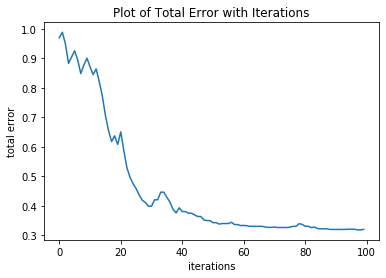

In [43]:
w, minimum_error, error_list = stochastic_gradient_descent(x, y, 100, 0.1)

In [44]:
minimum_error

array([0.3180983])

In [45]:
w

array([-0.5517644 , -1.75618954])

## Check Prediction on Graph

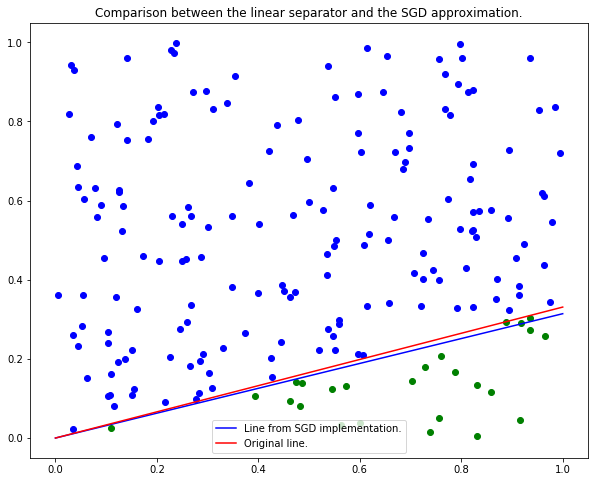

In [46]:
plt.rcParams["figure.figsize"] = (10,8)
# plot points on graph from given data

for i in range(N):
    if(y[i] == 1):
        plt.plot(x[i,0],x[i,1],'go')
    else:
        # Point is above line
        plt.plot(x[i,0],x[i,1], 'bo')

# plot w returned from Perceptron

# Using weights w to compute a,b for a line y=a*x+b

mnew = w[0]/w[1]
y_func = lambda x: mnew * x 

x_lin = np.linspace(0, 1)
plt.plot(x_lin, y_func(x_lin), 'b', label='Line from SGD implementation.')
plt.plot(x_lin, f(x_lin), 'r', label='Original line.')



plt.title('Comparison between the linear separator and the SGD approximation.')

plt.legend()